# Data Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Training process

average reward: 30643.09, min: 18162.55, max: 68854.28


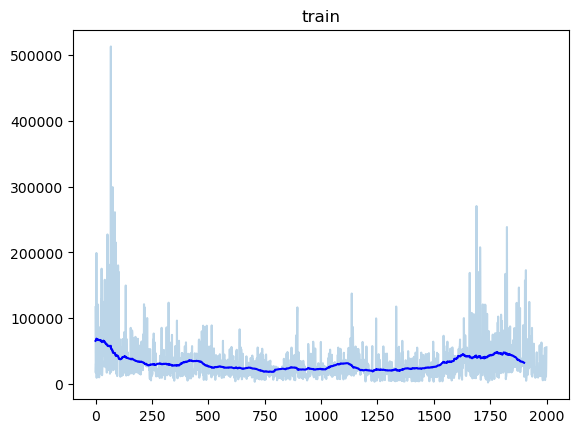

In [2]:
a = np.load(f"linear_rl_trader_rewards/train.npy")
# this is not exactly the reward, but the final portfolio value (we should subtract the initial cash)

# show the training progress
_ = plt.plot(a, alpha=0.3)

# _ = plt.hist(a, bins=20)

# calculate the moving average
a = np.convolve(a, np.ones(100) / 100, mode="valid")

# plot the moving average
_ = plt.plot(a, color="blue")

print(f"average reward: {a.mean():.2f}, min: {a.min():.2f}, max: {a.max():.2f}")


_ = plt.title("train")
_ = plt.show()

# Test process

average reward: 713085.31, min: 333200.95, max: 3510796.62


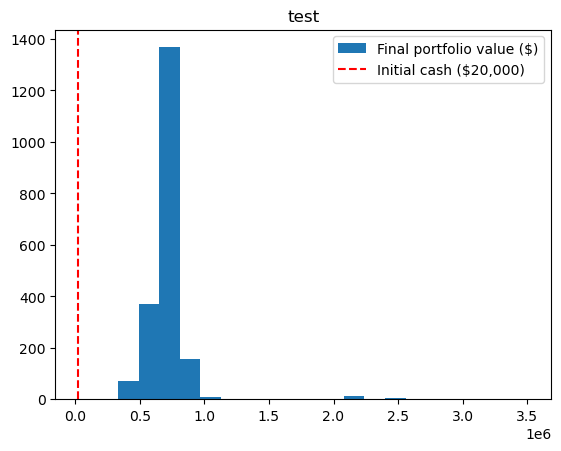

In [3]:
a = np.load(f"linear_rl_trader_rewards/test.npy")
# this is not exactly the reward, but the final portfolio value (we should subtract the initial cash)
print(f"average reward: {a.mean():.2f}, min: {a.min():.2f}, max: {a.max():.2f}")

# test - show a histogram of rewards
_ = plt.hist(a, bins=20, label="Final portfolio value ($)")

# plot a vertical line at 20000
_ = plt.axvline(20000, color="r", linestyle="--", label="Initial cash ($20,000)")

_ = plt.title("test")
_ = plt.legend()
_ = plt.show()

# Benchmark: S&P Crypto Index

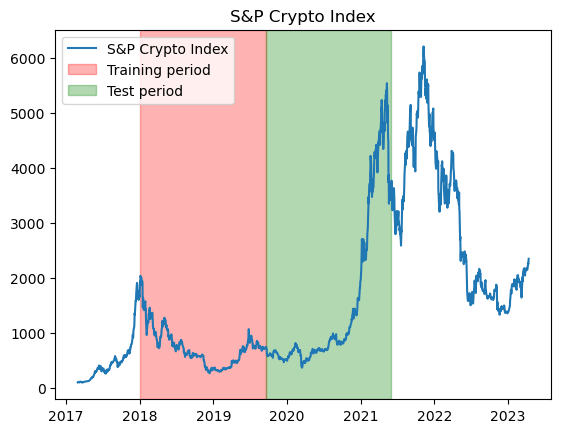

In [4]:
# Load the s&p index, skip the first 6 rows and the last 2 rows
df = pd.read_excel("PerformanceGraphExport.xls", skiprows=6, skipfooter=4)

# rename the columns
df.columns = ["date", "s&p"]

# convert the date column to datetime
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

# reset the index
df = df.reset_index(drop=True)

# sort the dataframe by date
df = df.sort_values(by="date")

# fill in the missing dates with interpolated values
df = df.set_index("date").resample("B").interpolate().reset_index()

start_timestamp = pd.to_datetime("2018-01-01")
end_timestamp = pd.to_datetime("2021-06-01")

# generate the calendar dates between start_timestamp and end_timestamp
dates = pd.date_range(start=start_timestamp, end=end_timestamp, freq="B")

# half way point
train_timestamp = dates[len(dates) // 2]

# plot the s&p index
_ = plt.plot(df["date"], df["s&p"], label="S&P Crypto Index")

# plot the training period
_ = plt.axvspan(
    start_timestamp, train_timestamp, alpha=0.3, color="red", label="Training period"
)

# plot the test period
_ = plt.axvspan(
    train_timestamp, end_timestamp, alpha=0.3, color="green", label="Test period"
)

_ = plt.legend()
_ = plt.title("S&P Crypto Index")
_ = plt.show()

In [5]:
# Calculate the returns of the s&p index during the test period
s_p_returns = df[df["date"] >= train_timestamp]["s&p"].pct_change()

# Calculate the returns of the portfolio during the test period
portfolio_returns = (a / 20000 - 1).mean()

# Calculate the cumulative returns of the s&p index during the test period
s_p_cum_returns = (s_p_returns + 1).cumprod()

# print the cumulative returns of the s&p index during the test period in %
print(f"S&P cumulative returns: {s_p_cum_returns.tail(1).values[0] * 100:.2f}%")

# print the cumulative returns of the portfolio during the test period in %
print(f"Portfolio cumulative returns: {portfolio_returns * 100:.2f}%")

S&P cumulative returns: 316.80%
Portfolio cumulative returns: 3465.43%
